In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

N = 50                                # Number of points in each direction
x_start, x_end = -6.0, 6.0            # x-direction boundaries
y_start, y_end = -6.0, 6.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

N_r=100
N_th=145
r_start, r_end = 1.15, 5.00
th_start, th_end = 0,360
r=numpy.linspace(r_start,r_end,N_r)
th=numpy.linspace(th_start,th_end,N_th)

x0, y0 = -0.2, 0.0

#lim=N_r*N_th
#MODEL=numpy.linspace(1,lim,lim)
x_build=numpy.zeros_like(r)
y_build=numpy.zeros_like(r)

for i in range(0,N_th):
    x_cy=r*numpy.cos(th[i])+x0
    y_cy=r*numpy.sin(th[i])+y0
    x_build=numpy.hstack((x_build,x_cy))
    y_build=numpy.hstack((y_build,y_cy))
    
index=range(0,100)
x_comp=numpy.delete(x_build,index)
y_comp=numpy.delete(y_build,index)

X_C,Y_C=numpy.meshgrid(x_comp,y_comp)

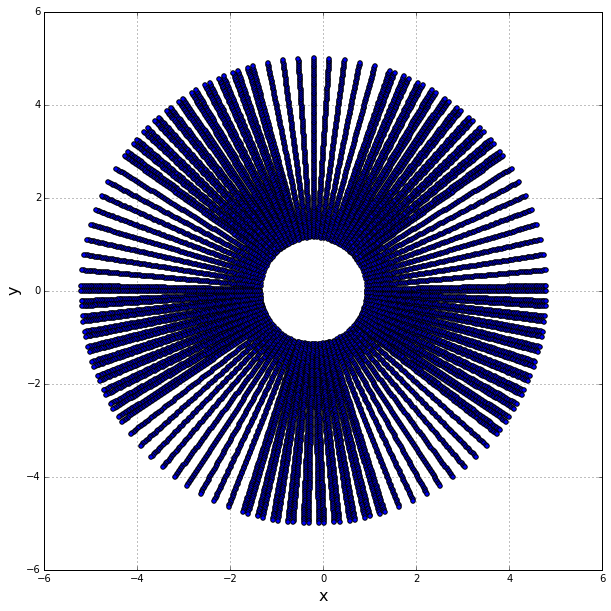

In [2]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(which='both', axis='both')
pyplot.scatter(x_comp, y_comp)
#pyplot.scatter(coords[0,:], coords[1,:])
#pyplot.streamplot(X, Y, z2.real, z2.imag, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

In [3]:
#------------------------------------------------------#
# Freestream Velocity Field
u_inf=1.0 #freestream speed, u_infinity
u_freestream=u_inf*numpy.ones_like(X_C)
v_freestream=numpy.zeros_like(Y_C)
# Stream-Function
psi_freestream=u_inf*Y
#------------------------------------------------------#
def joukowski_transform(zeta):
    """
     Arguments
        zeta:complex coordinates
        Output:
        z:complex coordinates
    """
    z = numpy.empty_like(zeta)
    z = zeta + (1/zeta) 
    return z
#------------------------------------------------------#
def get_velocity_doublet(strength, xd, yd, X_d, Y_d):
    """Returns the velocity field generated by a doublet.
     Arguments
        strength -- strength of the doublet.
        xd, yd -- coordinates of the doublet.
        X_d, Y_d -- mesh grid.
    """
    u_doublet = - strength/(2*math.pi)*((X_d-xd)**2-(Y_d-yd)**2)/((X_d-xd)**2+(Y_d-yd)**2)**2
    v_doublet = - strength/(2*math.pi)*2*(X_d-xd)*(Y_d-yd)/((X_d-xd)**2+(Y_d-yd)**2)**2
    return u_doublet, v_doublet
#------------------------------------------------------#
def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
     Input:
        strength -- strength of the doublet.
        xd, yd -- coordinates of the doublet.
        X, Y -- mesh grid.
    """
    psi_doublet = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi_doublet
#------------------------------------------------------#
def get_velocity_sourcesink(strength,xs,ys,X,Y):
    """Returns the velocity field generated by a source/sink.
     Arguments
      strength-->strength of the source/sink.
      xs,ys-->coordinates of the source/sink.
      X,Y-->mesh grid.
      """
    u_sourcesink=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v_sourcesink=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u_sourcesink,v_sourcesink
#------------------------------------------------------#
def get_stream_function_sourcesink(strength,xs,ys,X,Y):
    """Returns the stream-function generated by a source/sink.
     Arguments-->
      strength-->strength of the source/sink.
      xs,ys-->coordinates of the source/sink.
      X,Y-->mesh grid.
      """
    psi_sourcesink=strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi_sourcesink
#------------------------------------------------------#
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
     Arguments-->
        strength -- strength of the vortex.
        xv, yv -- coordinates of the vortex.
        X, Y -- mesh grid.
    """
    u_vortex = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v_vortex = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u_vortex, v_vortex
#------------------------------------------------------#
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi_vortex = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi_vortex
#------------------------------------------------------#

In [4]:
transfer = numpy.vstack((x_comp,y_comp))

zeta = numpy.empty_like(transfer, dtype=complex)
zeta.real = transfer[0,:]
zeta.imag = transfer[1,:]
z = joukowski_transform(zeta)
x_comp_j = z.real
y_comp_j = z.imag

In [ ]:
#Free Stream Calculated Above
#Doublet Input
k=(r_start**2)*2*numpy.pi*u_inf
u_doublet, v_doublet=get_velocity_doublet(k,x0,y0,X_C,Y_C)
psi_doublet=get_stream_function_doublet(k,x0,y0,X_C,Y_C)
#Vortex Input
#u_vortex, v_vortex= get_velocity_vortex(1.0,0.0,0.0,X,Y)
#psi_vortex=get_stream_function_vortex(1.0,0.0,0.0,X,Y)
#Superposition
u = (u_freestream + u_doublet) #+ u_vortex)
v = (v_freestream + v_doublet) #+ v_vortex)

In [ ]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(which='both', axis='both')
#pyplot.scatter(x_comp, y_comp)
#pyplot.scatter(x_comp_j,y_comp_j)
pyplot.streamplot(X_C, Y_C, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
print u.shape

In [ ]:
zeta2 = numpy.empty_like(X_C, dtype=complex)
zeta2.real = u
zeta2.imag = v
z2 = joukowski_transform(zeta2)

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(which='both', axis='both')
#pyplot.scatter(x_comp, y_comp)
pyplot.scatter(x_comp_j,y_comp_j)
#pyplot.streamplot(X, Y, z2.real, z2.imag, density=2, linewidth=1, arrowsize=1, arrowstyle='->')